In [1]:
import swirlpy
import numpy as np
from pyevtk.hl import gridToVTK 
from pyevtk.hl import pointsToVTK

In [2]:
#Load CO5BOLD Data

N = 960
xi = 0
yi = 0
zi = 93
zf = 223

t = 5750
    
box = swirlpy.Box(xi=[xi,yi,zi], xf=[xi+N,yi+N,zf+1],boundary=[0,0,0])
box.read(t, 
         '/home/cluster/jcaniv/bulk/job3D960x960x280_v50_superhighcad/COBOLD_sim', 
         ['v','B','Pre','tau'])

v Loaded!
B Loaded!
Pre Loaded!
tau Loaded!


In [12]:
t = 5750

vortexdata = np.load('../Test_Statistics/structures3D_t5750.npy', allow_pickle=True)

vortex = np.vstack(vortexdata)

x = np.asfortranarray(vortex[:,0]*10.)
y = np.asfortranarray(vortex[:,1]*10.)
z = np.asfortranarray(vortex[:,2]*10.)-300.

radius = np.asfortranarray(vortex[:,3]*10.)
rortex = np.asfortranarray(vortex[:,4])
Sv = np.asfortranarray(vortex[:,9])
Sh = np.asfortranarray(vortex[:,11])
MSz = np.asfortranarray(vortex[:,15])
Bz = np.asfortranarray(vortex[:,13])

pointsToVTK("/home/cluster/jcaniv/bulk/job3D960x960x280_v50_superhighcad/COBOLD_sim/VTS/Vortexdata_"+str(t), x, y, z, data={"radius":radius, "rortex":rortex, "Sv":Sv, "Sh":Sh, "MSz":MSz, "Bz":Bz, "x":x, "y":y, "z":z})

'/home/cluster/jcaniv/bulk/job3D960x960x280_v50_superhighcad/COBOLD_sim/VTS/Vortexdata_5750.vtu'

In [4]:
vortexdata = np.load('../Test_Statistics/structures3D_t5750.npy', allow_pickle=True)

[x,y,z] = box.v.x.shape

vortices = np.zeros((x,y,z))

for structure3D in vortexdata:
    for i,j,k,r in zip(structure3D[:,0],structure3D[:,1],structure3D[:,2],structure3D[:,3]):
        vortices[int(i),int(j),int(k)] = r
        
vortices = np.asfortranarray(vortices)

In [27]:
"""
from pyevtk.hl import pointsToVTK
import numpy as np

# Example 1
npoints = 100
x = np.random.rand(npoints)
y = np.random.rand(npoints)
z = np.random.rand(npoints)
pressure = np.random.rand(npoints)
temp = np.random.rand(npoints)
pointsToVTK("./rnd_points", x, y, z, data={"temp": temp, "pressure": pressure})

# Example 2
x = np.arange(1.0, 10.0, 0.1)
y = np.arange(1.0, 10.0, 0.1)
z = np.arange(1.0, 10.0, 0.1)
pointsToVTK("./line_points", x, y, z, data={"elev": z})
"""

'\nfrom pyevtk.hl import pointsToVTK\nimport numpy as np\n\n# Example 1\nnpoints = 100\nx = np.random.rand(npoints)\ny = np.random.rand(npoints)\nz = np.random.rand(npoints)\npressure = np.random.rand(npoints)\ntemp = np.random.rand(npoints)\npointsToVTK("./rnd_points", x, y, z, data={"temp": temp, "pressure": pressure})\n\n# Example 2\nx = np.arange(1.0, 10.0, 0.1)\ny = np.arange(1.0, 10.0, 0.1)\nz = np.arange(1.0, 10.0, 0.1)\npointsToVTK("./line_points", x, y, z, data={"elev": z})\n'

In [5]:
boxv = swirlpy.Box(xi=[xi,yi,zi], xf=[xi+N,yi+N,zf+1],boundary=[1,1,1])
boxv.read(t, 
         '/home/cluster/jcaniv/bulk/job3D960x960x280_v50_superhighcad/COBOLD_sim', 
         ['v'])

swirl = swirlpy.Swirl(boxv)
swirl.compute_swirl()

vorticity = swirlpy.Vort(boxv)
vorticity.compute_vort()

v Loaded!



===    Compute Swirling strength
===    dz = 133
===     Finish
===     Time elapsed: 11 m, 47.77999999999997 s



===     Compute vorticity strength
===     Finish
===     Time elapsed: 3.57 s


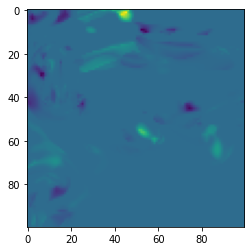

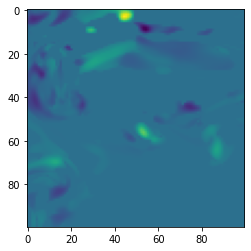

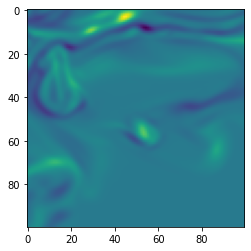

In [10]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(R[:100,:100,30])

plt.figure()
plt.imshow(swirl.z[:100,:100,30])

plt.figure()
plt.imshow(vorticity.z[:100,:100,30])

In [6]:
R1 = vorticity.z**2 - swirl.z**2
mask = R1 < 0.0
R1[mask] = 0.0

signR = np.sign(swirl.z)
# compute rortex

R2 = np.abs( np.abs(vorticity.z) - np.abs(np.sqrt(R1)) )
R = R2*signR

[x,y,z] = box.v.x.shape
Rortex = np.zeros((x,y,z))
Rortex[1:-1,1:-1,1:-1] = R

ValueError: could not broadcast input array from shape (960,960,131) into shape (958,958,129)

In [11]:
# Prepare arrays

[x,y,z] = box.v.x.shape


vx = np.asfortranarray(box.v.x)
vy = np.asfortranarray(box.v.y)
vz = np.asfortranarray(box.v.z)

Bx = np.asfortranarray(box.B.x)
By = np.asfortranarray(box.B.y)
Bz = np.asfortranarray(box.B.z)

R = np.asfortranarray(R)

tau1 = np.asfortranarray(box.tau.s)
Pre = np.asfortranarray(box.Pre.s)

beta = Pre/(Bx**2 + By**2 + Bz**2)*4*np.pi*2

xx = np.arange(x)*10.
yy = np.arange(y)*10.
zz = np.arange(z)*10.-300.
x,y,z = np.meshgrid(xx,yy,zz, indexing='ij')

gridToVTK("/home/cluster/jcaniv/bulk/job3D960x960x280_v50_superhighcad/COBOLD_sim/VTS/CO5BOLDdata_"+str(t), x, y, z, pointData = {"beta":beta, "tau":tau1, "vx" : vx,"vy" : vy, "vz" : vz, "Bx" : Bx,"By" : By, "Bz" : Bz, "R" : R})

'/home/cluster/jcaniv/bulk/job3D960x960x280_v50_superhighcad/COBOLD_sim/VTS/CO5BOLDdata_5750.vts'